# 读取数据

In [1]:
import numpy as np
import pandas as pd
import random
import matplotlib.pyplot as plt
import seaborn as sns
import re
from sklearn.metrics import roc_curve, auc
import os 
SEED = 42  # 全局随机种子锁
np.random.seed(SEED)          # NumPy
random.seed(SEED)             # Python
os.environ['PYTHONHASHSEED'] = str(SEED)
# 线程级也锁死（可选，保证 100% 复现）
os.environ['OMP_NUM_THREADS'] = '1'
os.environ['MKL_NUM_THREADS'] = '1'
import warnings
warnings.filterwarnings('ignore')

df = pd.read_excel('CEML2原始数据.xlsx')
df.head(500)

,Age,Sex,PVA,BCVA,PreIOP,HOS,DM,HbA1c,HTN,TG,...,TOT,Average Vacuum,Vacuum Time,US AVE,U/S APT,CDE2,CDE,EPT,IFU,CTS
0,78,1,1.00,1.00,18,0,1,7.0,1.0,2.40,...,659,269.9,178.7,5,78.30,391.50,19.55,3.91,111,0
1,35,1,0.70,0.70,13,0,0,0.0,0.0,5.14,...,648,276.8,151.5,2,23.44,46.88,1.02,0.51,74,0
2,60,0,0.52,0.52,21,0,0,0.0,0.0,2.06,...,656,158.4,134.0,10,55.49,554.90,59.30,5.93,72,0
3,55,1,1.90,1.90,21,0,0,0.0,0.0,0.98,...,762,195.3,150.0,15,75.59,1133.85,171.15,11.41,86,1
4,69,0,2.30,2.20,18,0,0,0.0,0.0,4.06,...,1116,306.4,355.9,4,58.46,233.84,9.56,2.39,148,1
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
303,69,1,0.52,0.52,22,0,0,0.0,0.0,1.09,...,624,251.5,170.8,7,44.27,309.89,22.61,3.23,91,0
304,64,0,0.22,0.00,17,0,0,0.0,1.0,2.09,...,523,273.8,137.6,1,25.10,25.10,0.45,0.45,91,0
305,56,0,1.85,0.92,18,0,0,0.0,NaN,0.60,...,552,296.1,131.0,11,54.84,603.24,68.75,6.25,87,0
306,71,0,1.22,1.00,20,0,0,0.0,0.0,1.01,...,698,235.7,208.2,17,126.08,2143.36,377.23,22.19,99,1


# 查看缺失值

缺失值统计（缺失率>0）：
   特征名  缺失数       缺失率
8  HTN    1  0.324675


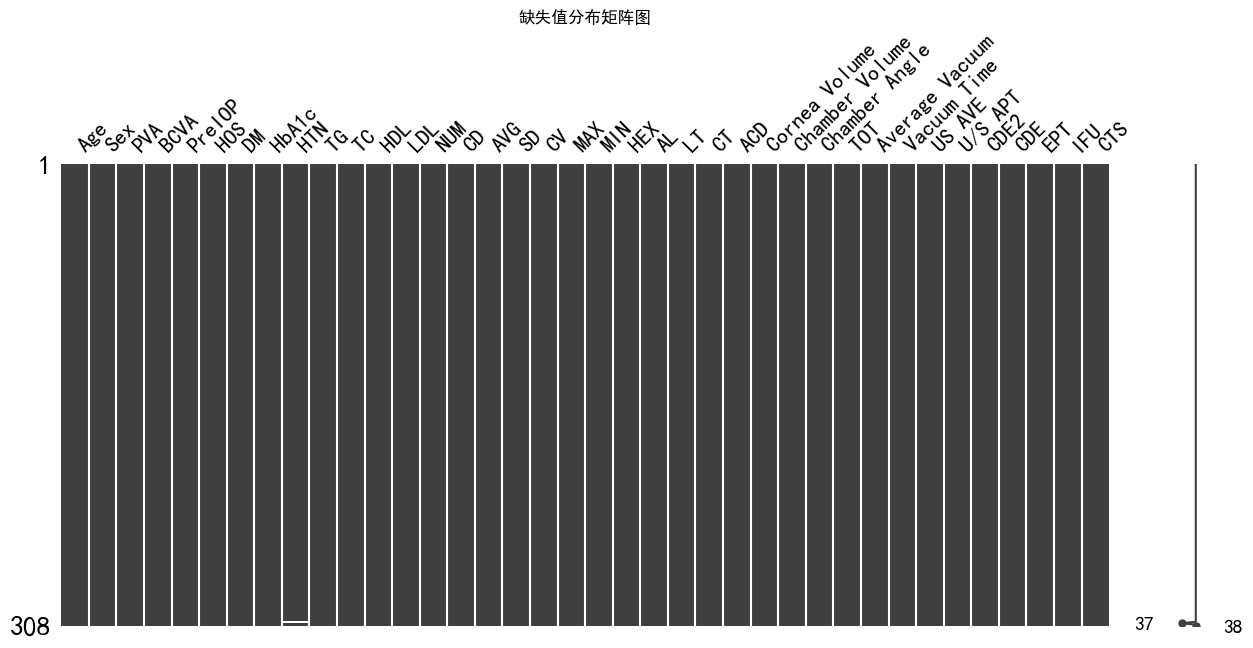

In [2]:
import matplotlib as mpl

# 设置中文字体
mpl.rcParams['font.sans-serif'] = ['SimHei']
# 解决负号显示问题
mpl.rcParams['axes.unicode_minus'] = False

# 统计各列缺失值数量（百分比）
missing = df.isnull().sum().reset_index()
missing.columns = ['特征名', '缺失数']
missing['缺失率'] = (missing['缺失数'] / df.shape[0]) * 100

# 显示缺失值 >0 的列
print("缺失值统计（缺失率>0）：")
print(missing[missing['缺失数'] > 0].sort_values('缺失率', ascending=False))

# 可视化缺失值分布（矩阵图）
import missingno as msno
msno.matrix(df, figsize=(15, 6))
plt.title('缺失值分布矩阵图')
plt.show()

# 填充缺失值

In [3]:
import pandas as pd
from sklearn.impute import SimpleImputer

# 1. 识别缺失列
missing_cols = df.columns[df.isnull().any()].tolist()

# 2. 中位数填充（适用于连续数值型特征）
imputer = SimpleImputer(strategy='median')
df[missing_cols] = imputer.fit_transform(df[missing_cols])

# 3. 验证填充结果
print("填充后各列缺失值数量：")
df.isnull().sum()

填充后各列缺失值数量：


Age               0
Sex               0
PVA               0
BCVA              0
PreIOP            0
HOS               0
DM                0
HbA1c             0
HTN               0
TG                0
TC                0
HDL               0
LDL               0
NUM               0
CD                0
AVG               0
SD                0
CV                0
MAX               0
MIN               0
HEX               0
AL                0
LT                0
CT                0
ACD               0
Cornea Volume     0
Chamber Volume    0
Chamber Angle     0
TOT               0
Average Vacuum    0
Vacuum Time       0
US AVE            0
U/S APT           0
CDE2              0
CDE               0
EPT               0
IFU               0
CTS               0
dtype: int64

In [4]:
df['LT'] = pd.to_numeric(df['LT'], errors='coerce')  # 转成数值
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 308 entries, 0 to 307
Data columns (total 38 columns):
 #   Column          Non-Null Count  Dtype  
---  ------          --------------  -----  
 0   Age             308 non-null    int64  
 1   Sex             308 non-null    int64  
 2   PVA             308 non-null    float64
 3   BCVA            308 non-null    float64
 4   PreIOP          308 non-null    int64  
 5   HOS             308 non-null    int64  
 6   DM              308 non-null    int64  
 7   HbA1c           308 non-null    float64
 8   HTN             308 non-null    float64
 9   TG              308 non-null    float64
 10  TC              308 non-null    float64
 11  HDL             308 non-null    float64
 12  LDL             308 non-null    float64
 13  NUM             308 non-null    int64  
 14  CD              308 non-null    int64  
 15  AVG             308 non-null    int64  
 16  SD              308 non-null    int64  
 17  CV              308 non-null    int

# 划分数据集X和Y

In [5]:
# 分离特征和目标变量
X = df.drop('CTS', axis=1)  # 获取特征
y = df['CTS']  # 获取目标变量 

# 打印 X 和 y 的前几行以验证结果
print("Features (X):")
X

Features (X):


,Age,Sex,PVA,BCVA,PreIOP,HOS,DM,HbA1c,HTN,TG,...,Chamber Angle,TOT,Average Vacuum,Vacuum Time,US AVE,U/S APT,CDE2,CDE,EPT,IFU
0,78,1,1.00,1.00,18,0,1,7.0,1.0,2.40,...,21.1,659,269.9,178.7,5,78.30,391.50,19.55,3.91,111
1,35,1,0.70,0.70,13,0,0,0.0,0.0,5.14,...,34.3,648,276.8,151.5,2,23.44,46.88,1.02,0.51,74
2,60,0,0.52,0.52,21,0,0,0.0,0.0,2.06,...,30.9,656,158.4,134.0,10,55.49,554.90,59.30,5.93,72
3,55,1,1.90,1.90,21,0,0,0.0,0.0,0.98,...,31.5,762,195.3,150.0,15,75.59,1133.85,171.15,11.41,86
4,69,0,2.30,2.20,18,0,0,0.0,0.0,4.06,...,30.2,1116,306.4,355.9,4,58.46,233.84,9.56,2.39,148
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
303,69,1,0.52,0.52,22,0,0,0.0,0.0,1.09,...,32.0,624,251.5,170.8,7,44.27,309.89,22.61,3.23,91
304,64,0,0.22,0.00,17,0,0,0.0,1.0,2.09,...,22.4,523,273.8,137.6,1,25.10,25.10,0.45,0.45,91
305,56,0,1.85,0.92,18,0,0,0.0,0.0,0.60,...,35.1,552,296.1,131.0,11,54.84,603.24,68.75,6.25,87
306,71,0,1.22,1.00,20,0,0,0.0,0.0,1.01,...,32.4,698,235.7,208.2,17,126.08,2143.36,377.23,22.19,99


# 划分训练集和测试集并标准化

In [6]:
from  sklearn.preprocessing import MinMaxScaler, StandardScaler
from sklearn.model_selection import GridSearchCV,train_test_split,cross_val_score

# 划分数据集
X_train,X_test,y_train,y_test = train_test_split(X,y,test_size=.2,random_state=SEED,stratify=y)
# 创建标准化器
scaler = StandardScaler()
# 使用训练集的特征拟合标准化器，并对训练集进行转换
X_train_scaled = scaler.fit_transform(X_train)
# 将标准化后的 X_train 转换为 DataFrame，并保持列名
X_train_scaled = pd.DataFrame(X_train_scaled, columns=X_train.columns)
# 使用相同的标准化器对测试集进行转换
X_test_scaled = scaler.transform(X_test)
# 将标准化后的 X_test 转换为 DataFrame，并保持列名
X_test_scaled = pd.DataFrame(X_test_scaled, columns=X_test.columns)
print("-------------- 原始训练集异常值 -------------------")
print(X_train_scaled.isnull().sum().sort_values(ascending=False).head(2))
print("-------------- 原始测试集异常值 -------------------")
print(X_test_scaled.isnull().sum().sort_values(ascending=False).head(2))

# 中位数填补
X_train_scaled['LT'].fillna(X_train_scaled['LT'].median(), inplace=True)
# 测试集里也可能出现 NaN，同样处理
X_test_scaled['LT'].fillna(X_train_scaled['LT'].median(), inplace=True)
print("-------------- 填补后训练集异常值 -------------------")
print(X_train_scaled.isnull().sum().sort_values(ascending=False).head(2))

-------------- 原始训练集异常值 -------------------
LT     1
Age    0
dtype: int64
-------------- 原始测试集异常值 -------------------
Age    0
MIN    0
dtype: int64
-------------- 填补后训练集异常值 -------------------
Age    0
MIN    0
dtype: int64


# Lasso特征筛选

## 创建L1-Logistic 2分类模型

In [7]:
from sklearn.linear_model import LogisticRegression
from sklearn.preprocessing import StandardScaler

log_reg_l1 = LogisticRegression(
    penalty='l1',        # L1 正则化
    solver='liblinear',  # 支持 L1 正则化的求解器
    C=1.0,               # 正则化强度的倒数，值越小正则化越强
    random_state=42
)

log_reg_l1.fit(X_train_scaled, y_train)

LogisticRegression(penalty='l1', random_state=42, solver='liblinear')

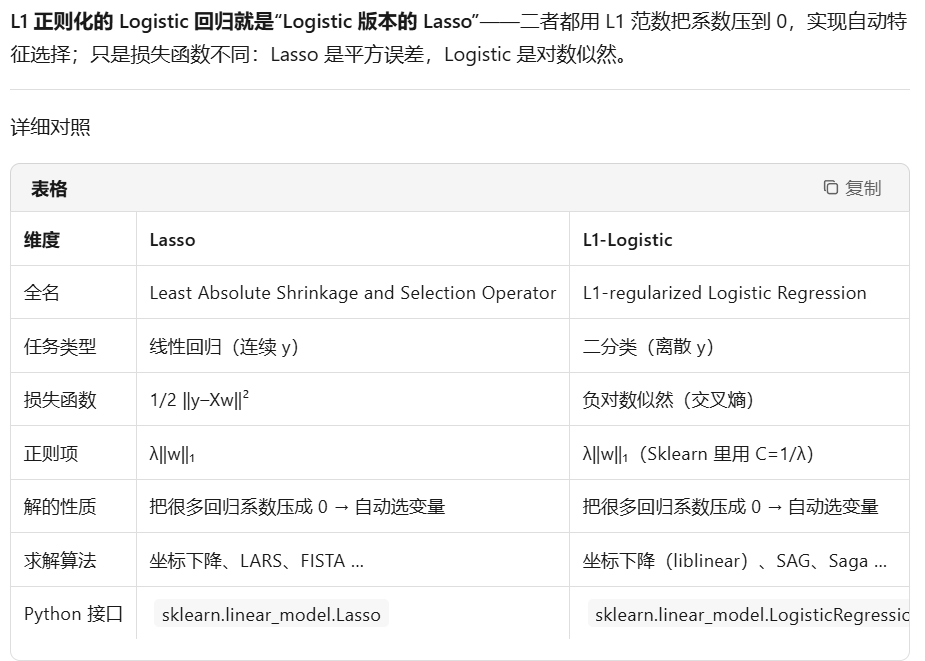

## 10折交叉验证

In [8]:
# 0. 环境
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
from sklearn.linear_model import LogisticRegression
from sklearn.metrics import roc_auc_score, log_loss
from sklearn.model_selection import StratifiedKFold

# 1. 超参数网格
lambdas = np.logspace(-3, 1, 100)  # 定义了100个不同的正则化参数（lambda或C），并对每一个都完整地执行了一次10折交叉验证来评估其性能。
Cs = 1 / lambdas
cv = StratifiedKFold(n_splits=10, shuffle=True, random_state=42)

# 2. 容器
records = []   # 每个 λ 存一条 dict

# 3. 主循环 (用于计算AUC和Deviance)
for lambda_val, C in zip(lambdas, Cs):
    fold_auc, fold_dev, fold_nfeat = [], [], []

    for tr_idx, val_idx in cv.split(X_train_scaled, y_train):
        X_tr, X_val = X_train_scaled.iloc[tr_idx], X_train_scaled.iloc[val_idx]
        y_tr, y_val = y_train.iloc[tr_idx], y_train.iloc[val_idx]

        model = LogisticRegression(penalty='l1', solver='liblinear',
                                   C=C, random_state=42, max_iter=1000)
        model.fit(X_tr, y_tr)

        # --- 非零系数 ---
        fold_nfeat.append(np.count_nonzero(model.coef_))

        # --- AUC ---
        prob = model.predict_proba(X_val)[:, 1]
        fold_auc.append(roc_auc_score(y_val, prob))

        # --- 二项偏差 ---
        prob = np.clip(prob, 1e-15, 1 - 1e-15)
        fold_dev.append(2 * log_loss(y_val, prob))

    # 4. 记录当前 λ 结果
    records.append({
        'lambda': lambda_val,
        'C': C,
        'Mean_AUC': np.mean(fold_auc),
        'AUC_Std': np.std(fold_auc, ddof=1),
        'Mean_Deviance': np.mean(fold_dev),
        'Dev_Std': np.std(fold_dev, ddof=1),
        'n_features': int(np.round(np.mean(fold_nfeat))) # 这个值暂时保留，用于其他分析
    })

# 5. 转 DataFrame
results_df = pd.DataFrame(records)
results_df

,lambda,C,Mean_AUC,AUC_Std,Mean_Deviance,Dev_Std,n_features
0,0.001000,1000.000000,0.783946,0.121917,1.494767,1.080281,37
1,0.001097,911.162756,0.783946,0.121917,1.494632,1.080106,37
2,0.001205,830.217568,0.783946,0.121917,1.494316,1.079438,37
3,0.001322,756.463328,0.784681,0.120919,1.494060,1.078953,37
4,0.001451,689.261210,0.784681,0.120919,1.496056,1.084893,37
...,...,...,...,...,...,...,...
95,6.892612,0.145083,0.806173,0.111713,0.969405,0.180349,13
96,7.564633,0.132194,0.809206,0.114142,0.972538,0.173136,12
97,8.302176,0.120450,0.807864,0.114770,0.977196,0.165584,11
98,9.111628,0.109750,0.804836,0.115719,0.983326,0.157536,10


## 10折交叉验证误差曲线

In [9]:
# # 0. 环境
# import numpy as np
# import pandas as pd
# import matplotlib.pyplot as plt
# from sklearn.linear_model import LogisticRegression
# from sklearn.metrics import log_loss
# from sklearn.model_selection import StratifiedKFold

# # 1. 超长 λ 网格：1e-3 → 1e5（200 点）
# lambdas = np.logspace(-3, 5, 200)
# Cs = 1 / lambdas
# cv = StratifiedKFold(n_splits=10, shuffle=True, random_state=42)

# # 2. 容器
# records = []

# # 3. 主循环
# for lambda_val, C in zip(lambdas, Cs):
#     fold_dev, fold_nfeat = [], []
#     for tr_idx, val_idx in cv.split(X_train_scaled, y_train):
#         X_tr, X_val = X_train_scaled.iloc[tr_idx], X_train_scaled.iloc[val_idx]
#         y_tr, y_val = y_train.iloc[tr_idx], y_train.iloc[val_idx]

#         model = LogisticRegression(penalty='l1', solver='liblinear',
#                                    C=C, random_state=42, max_iter=1000)
#         model.fit(X_tr, y_tr)

#         # 非零系数
#         fold_nfeat.append(np.count_nonzero(model.coef_))

#         # 二项偏差
#         prob = np.clip(model.predict_proba(X_val)[:, 1], 1e-15, 1 - 1e-15)
#         fold_dev.append(2 * log_loss(y_val, prob))

#     records.append({
#         'lambda': lambda_val,
#         'C': C,
#         'Mean_Deviance': np.mean(fold_dev),
#         'Dev_Std': np.std(fold_dev, ddof=1),
#         'n_features': int(np.round(np.mean(fold_nfeat)))
#     })

# # 4. 转表
# results_df = pd.DataFrame(records)

# # 5. 关键：截断到第一个 0 特征
# zero_mask = results_df['n_features'].eq(0)
# if zero_mask.any():
#     first_zero_idx = zero_mask.idxmax()          # 第一个 0 的行号
#     results_df = results_df.iloc[:first_zero_idx + 1]   # 保留这一点

# # 6. 计算 λ_min 与 λ_1se（基于 Deviance）
# mean_dev = results_df['Mean_Deviance'].values
# std_dev  = results_df['Dev_Std'].values
# log_lambda = np.log10(results_df['lambda'].values)

# best_idx  = np.argmin(mean_dev)
# best_mean = mean_dev[best_idx]
# best_std  = std_dev[best_idx]
# threshold = best_mean + best_std
# candidates = np.where(mean_dev <= threshold)[0]
# _1se_idx = candidates[-1]          # 最右 λ
# _1se_log = log_lambda[_1se_idx]

# # 7. 画图
# fig, ax = plt.subplots(figsize=(10, 6))

# # 误差棒
# ax.errorbar(log_lambda, mean_dev, yerr=std_dev,
#             fmt='o-', color='red', ecolor='gray',
#             capsize=2, lw=1, markersize=3,
#             label='Mean Binomial Deviance ± 1 SE')

# # 双竖线
# ax.axvline(log_lambda[best_idx], ls='--', color='#87CEFA', lw=2,
#            label=r'$\lambda_{\min}$')
# ax.axvline(_1se_log, ls='--', color='navy', lw=2,
#            label=r'$\lambda_{1se}$')

# # 顶部轴：特征数量（只显示到 0）
# ax2 = ax.twiny()
# ax2.set_xlim(ax.get_xlim())
# n_features = results_df['n_features'].values
# tick_idx = np.linspace(0, len(n_features)-1, min(10, len(n_features)), dtype=int)
# ax2.set_xticks(log_lambda[tick_idx])
# ax2.set_xticklabels(n_features[tick_idx], fontsize=11)
# ax2.set_xlabel('Number of non-zero features', fontsize=13, weight='bold')

# # 装饰
# ax.set_xlabel(r'log$_{10}(\lambda)$', fontsize=18, weight='bold')
# ax.set_ylabel('Binomial Deviance', fontsize=18, weight='bold')
# ax.tick_params(labelsize=14)
# ax.legend()
# ax.grid(alpha=0.3)
# plt.tight_layout()
# # plt.savefig("lassoCV_deviance.pdf", format='pdf', dpi=1200)
# plt.show()

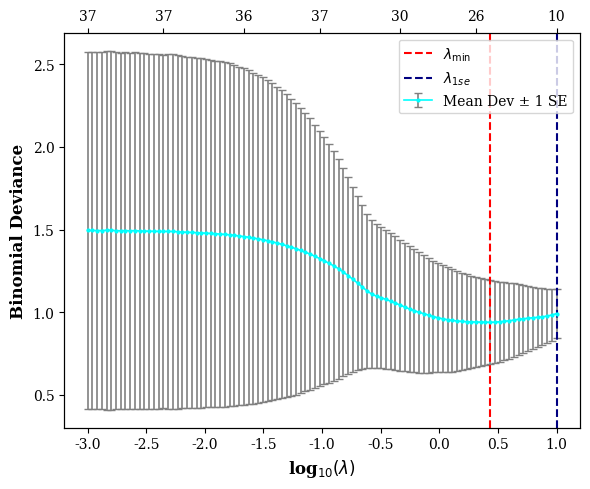

λ_min: n_features = 25
  non-zero vars: ['Age', 'BCVA', 'PreIOP', 'DM', 'HbA1c', 'HTN', 'TG', 'TC', 'HDL', 'LDL', 'AVG', 'SD', 'MIN', 'HEX', 'AL', 'CT', 'ACD', 'Cornea Volume', 'Chamber Volume', 'Chamber Angle', 'TOT', 'Average Vacuum', 'U/S APT', 'EPT', 'IFU'] 

λ_1se: n_features = 10
  non-zero vars: ['Age', 'BCVA', 'PreIOP', 'HbA1c', 'HEX', 'ACD', 'TOT', 'U/S APT', 'EPT', 'IFU'] 



In [10]:
# 设置英文新罗马字体（Times New Roman）
mpl.rcParams['font.sans-serif'] = 'Times New Roman'  # 新罗马 
mpl.rcParams['font.family'] = 'serif'  # 指定为衬线字体
# 解决负号显示问题
mpl.rcParams['axes.unicode_minus'] = False

# 在全量数据上重新训练，以获取用于绘图的特征数 ---
full_data_n_features = []
for C in Cs:
    model = LogisticRegression(penalty='l1', solver='liblinear',
                               C=C, random_state=42, max_iter=1000)
    model.fit(X_train_scaled, y_train) # 在整个训练集上训练
    full_data_n_features.append(np.count_nonzero(model.coef_))

# 6. 计算 λ_min 与 λ_1se
mean_dev = results_df['Mean_Deviance'].values
std_dev  = results_df['Dev_Std'].values
log_lambda = np.log10(results_df['lambda'].values)

best_idx  = np.argmin(mean_dev)
best_mean = mean_dev[best_idx]
best_std  = std_dev[best_idx]
threshold = best_mean + best_std
candidates = np.where(mean_dev <= threshold)[0]
_1se_idx = candidates[-1]
_1se_log = log_lambda[_1se_idx]

# 7. 画图
fig, ax = plt.subplots(figsize=(6, 5),dpi=100)

# 7-1 主曲线（误差棒）青色+灰色
ax.errorbar(log_lambda, mean_dev, yerr=std_dev,
            fmt='o-', color='cyan', ecolor='gray',
            capsize=3, lw=1.2, markersize=2,
            label='Mean Binomial Deviance ± 1 SE')

# 7-2 双竖线
ax.axvline(log_lambda[best_idx], ls='--', color='red', lw=1.5)
ax.axvline(_1se_log, ls='--', color='navy', lw=1.5)

# 一行图例
ax.legend([r'$\lambda_{\min}$', r'$\lambda_{1se}$','Mean Dev ± 1 SE'],
          frameon=True, loc='upper right', fontsize=10)

# 7-3 顶部轴：特征数量 
ax2 = ax.twiny()
ax2.set_xlim(ax.get_xlim())

# --- 使用在全量数据上训练得到的特征数 ---
n_features_for_plot = np.array(full_data_n_features) # <--- 使用新数据
idx_ticks = np.linspace(0, len(n_features_for_plot)-1, 7, dtype=int)
ax2.set_xticks(log_lambda[idx_ticks])
ax2.set_xticklabels(n_features_for_plot[idx_ticks], fontsize=10) # <--- 使用新数据

# 7-4 装饰
ax.set_xlabel(r'log$_{10}(\lambda)$', fontsize=12, weight='bold')
ax.set_ylabel('Binomial Deviance', fontsize=12, weight='bold')
ax.tick_params(labelsize=10)
# ax.grid(alpha=0.3)
plt.tight_layout()
plt.savefig("lassoCV_deviance_双准则.pdf", format='pdf', dpi=300)
plt.show()

# 8. 打印两个准则处的「特征数 + 特征名」 
for name, idx in [('λ_min', best_idx), ('λ_1se', _1se_idx)]:
    C_val = results_df.iloc[idx]['C']
    model = LogisticRegression(penalty='l1', solver='liblinear',
                               C=C_val, random_state=42, max_iter=1000)
    model.fit(X_train_scaled, y_train)          # 用全数据重训一次
    coef = model.coef_[0]
    nz_mask = coef != 0
    nz_names = X_train_scaled.columns[nz_mask].tolist()
    print(f"{name}: n_features = {len(nz_names)}")
    print("  non-zero vars:", nz_names, "\n")


λ_min 追求在验证集上的最佳预测性能，但模型更复杂、易过拟合；而 λ_1se 主动牺牲一点性能，以换取一个更简洁、特征更少、泛化能力更强的稳健模型。

## 提取Lasso系数

In [11]:
# 使用已有的 'Mean_Deviance' 列来找到性能最佳的行
# 用 .idxmin() 因为 Deviance 越小越好
best_row = results_df.loc[results_df['Mean_Deviance'].idxmin()] 

# 提取 lambda 和 C
best_lambda = best_row['lambda']
best_C = best_row['C'] 

print(f"最佳 lambda (基于最小Deviance) = {best_lambda}")
print(f"对应的 C = {best_C}")

# 用最优参数拟合整个训练集
best_model = LogisticRegression(
    penalty='l1',
    solver='liblinear',
    C=best_C,
    random_state=42,
    max_iter=1000
)
best_model.fit(X_train_scaled, y_train)

# 提取系数
# 确保X_train_scaled是一个DataFrame，并且有columns属性
coef = pd.Series(best_model.coef_[0], index=X_train_scaled.columns)

# 打印非零特征和数量
n_selected = (coef != 0).sum()
n_eliminated = (coef == 0).sum()
print(f"\nLasso picked {n_selected} variables and eliminated {n_eliminated} others.\n")

# 输出非零特征和对应系数
selected_features = coef[coef != 0].sort_values(ascending=False) # 排序后更易读
print("Selected Features with Coefficients:")
print(selected_features)

最佳 lambda (基于最小Deviance) = 2.718588242732943
对应的 C = 0.36783797718286304

Lasso picked 25 variables and eliminated 12 others.

Selected Features with Coefficients:
EPT               1.040928
Age               0.632164
BCVA              0.590408
TOT               0.365621
TC                0.278047
Chamber Angle     0.221335
PreIOP            0.202419
HbA1c             0.183981
DM                0.159717
IFU               0.157068
U/S APT           0.082562
MIN               0.075632
TG                0.067933
AVG               0.044206
Average Vacuum   -0.004635
SD               -0.007880
Cornea Volume    -0.025110
Chamber Volume   -0.037075
AL               -0.051557
HTN              -0.053733
CT               -0.076834
HEX              -0.199287
HDL              -0.226299
LDL              -0.384718
ACD              -0.568723
dtype: float64


## 可视化整个Lasso正则化路径

**展示随着正则化强度（λ）的变化，模型中每个特征的系数是如何变化**

In [12]:
# 初始化
coefs = []
log_lambdas = np.log10(lambdas)  # 与 Cs = 1 / lambdas 相对应
feature_names = X_train_scaled.columns

# 遍历每个 lambda（对应 C = 1 / lambda）
for C in 1 / lambdas:
    model = LogisticRegression(
        penalty='l1',
        solver='liblinear',
        C=C,
        random_state=42,
        max_iter=1000
    )
    model.fit(X_train_scaled, y_train)
    coefs.append(model.coef_[0])

# 转换为 DataFrame：每行是 lambda，每列是特征
coef_df = pd.DataFrame(coefs, columns=feature_names, index=log_lambdas)
coef_df

,Age,Sex,PVA,BCVA,PreIOP,HOS,DM,HbA1c,HTN,TG,...,Chamber Angle,TOT,Average Vacuum,Vacuum Time,US AVE,U/S APT,CDE2,CDE,EPT,IFU
-3.000000,0.933035,-0.120556,-0.210393,1.053745,0.581331,0.113214,0.604610,0.190459,-0.385445,0.316242,...,0.425500,0.636254,-0.797970,-0.020547,0.645821,0.941520,-9.226503,0.151597,9.235587,0.343337
-2.959596,0.933022,-0.120494,-0.210277,1.053596,0.581315,0.113175,0.604517,0.190470,-0.385389,0.316226,...,0.425489,0.636201,-0.797868,-0.020529,0.645276,0.940888,-9.221905,0.150801,9.232851,0.343314
-2.919192,0.933008,-0.120425,-0.210149,1.053433,0.581298,0.113131,0.604416,0.190481,-0.385328,0.316207,...,0.425477,0.636143,-0.797757,-0.020509,0.644678,0.940196,-9.216868,0.149928,9.229855,0.343290
-2.878788,0.932992,-0.120350,-0.210009,1.053254,0.581278,0.113084,0.604305,0.190494,-0.385261,0.316187,...,0.425464,0.636079,-0.797634,-0.020488,0.644022,0.939435,-9.211342,0.148970,9.226569,0.343262
-2.838384,0.932975,-0.120267,-0.209856,1.053057,0.581257,0.113032,0.604183,0.190508,-0.385187,0.316165,...,0.425450,0.636009,-0.797499,-0.020464,0.643301,0.938600,-9.205273,0.147919,9.222960,0.343232
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
0.838384,0.459599,0.000000,0.000000,0.482626,0.080716,0.000000,0.006105,0.177707,0.000000,0.000000,...,0.026531,0.162685,0.000000,0.005888,0.000000,0.084525,0.000000,0.000000,0.710901,0.082218
0.878788,0.439020,0.000000,0.000000,0.476418,0.066231,0.000000,0.001455,0.167045,0.000000,0.000000,...,0.008951,0.144616,0.000000,0.002486,0.000000,0.093415,0.000000,0.000000,0.670272,0.077103
0.919192,0.417433,0.000000,0.000000,0.468606,0.052089,0.000000,0.000000,0.151360,0.000000,0.000000,...,0.000000,0.125345,0.000000,0.000000,0.000000,0.104034,0.000000,0.000000,0.626801,0.070078
0.959596,0.396800,0.000000,0.000000,0.457575,0.038131,0.000000,0.000000,0.132693,0.000000,0.000000,...,0.000000,0.104387,0.000000,0.000000,0.000000,0.114360,0.000000,0.000000,0.583991,0.058898


## 绘制lasso系数轨迹图

In [13]:
# import numpy as np
# import pandas as pd
# import matplotlib.pyplot as plt
# from matplotlib.font_manager import FontProperties
# import matplotlib.cm as cm

# # --- 1. 从 results_df 中获取 λ_min 和 λ_1se ---
# # 使用已有的 'Mean_Deviance' 列
# best_idx_min = results_df['Mean_Deviance'].idxmin()
# lambda_min = results_df.loc[best_idx_min, 'lambda']

# # 计算 λ_1se 
# mean_dev = results_df['Mean_Deviance'].values
# std_dev = results_df['Dev_Std'].values
# best_mean_dev = mean_dev[best_idx_min]
# best_std_dev = std_dev[best_idx_min]
# threshold = best_mean_dev + best_std_dev
# candidates = np.where(mean_dev <= threshold)[0]
# _1se_idx = candidates[-1]
# lambda_1se = results_df.loc[_1se_idx, 'lambda']


# # --- 2. 开始绘图 ---
# fig, ax = plt.subplots(figsize=(10, 6))

# # --- 3. 绘制系数路径 ---
# # 当特征数量非常多时，绘制所有线条会导致图无法阅读。
# # 学术做法通常是：只绘制那些在 λ_1se 处被选中的重要特征的路径。
# # 或者，如果特征不多，可以用半透明颜色绘制所有线条。

# # 获取在 λ_1se 处被选中的特征
# # 首先，我们需要在 λ_1se 处训练一个模型来获取特征
# C_1se = results_df.loc[_1se_idx, 'C']
# model_1se = LogisticRegression(penalty='l1', solver='liblinear', C=C_1se, random_state=42, max_iter=1000)
# model_1se.fit(X_train_scaled, y_train)
# selected_features_mask = model_1se.coef_[0] != 0
# selected_feature_names = X_train_scaled.columns[selected_features_mask]

# # 绘制所有特征的路径，但使用低透明度
# for col in coef_df.columns:
#     ax.plot(coef_df.index, coef_df[col], color='gray', linewidth=0.8, alpha=0.4)

# # 高亮显示被选中特征的路径
# num_selected = len(selected_feature_names)
# cmap = cm.get_cmap('viridis', num_selected) # 使用 viridis 配色
# colors = [cmap(i) for i in range(num_selected)]

# for i, col in enumerate(selected_feature_names):
#     ax.plot(coef_df.index, coef_df[col], label=col, color=colors[i], linewidth=2.0)

# # --- 4. 添加关键竖线和零线 ---
# ax.axvline(np.log10(lambda_min), linestyle='--', color='#87CEFA', linewidth=2, label=r'$\lambda_{min}$')
# ax.axvline(np.log10(lambda_1se), linestyle='--', color='navy', linewidth=2, label=r'$\lambda_{1se}$')
# ax.axhline(0, color='black', linestyle='-', linewidth=1)

# # --- 5. 设置标签和格式 ---
# ax.set_xlabel(r'log$_{10}(\lambda)$', fontsize=14, weight='bold')
# ax.set_ylabel('Coefficient Value', fontsize=14, weight='bold')
# ax.tick_params(labelsize=12)
# ax.grid(True, which='both', linestyle='--', linewidth=0.5)

# # --- 6. 设置图例  ---
# # 只显示被选中特征的图例和λ的图例
# handles, labels = ax.get_legend_handles_labels()
# # 将λ的图例放到最后
# order = [i for i in range(num_selected)] + [num_selected, num_selected+1]
# ax.legend([handles[idx] for idx in order], [labels[idx] for idx in order],
#           loc='upper left', bbox_to_anchor=(1.02, 1), # 放在图外右侧
#           fontsize=10, frameon=True, fancybox=True, shadow=True)

# # --- 7. 保存和显示 ---
# plt.tight_layout(rect=[0, 0, 0.85, 1]) # 为右侧图例留出空间
# plt.savefig("lasso_coefficient_path.pdf", format='pdf', dpi=300, bbox_inches='tight')
# plt.show()

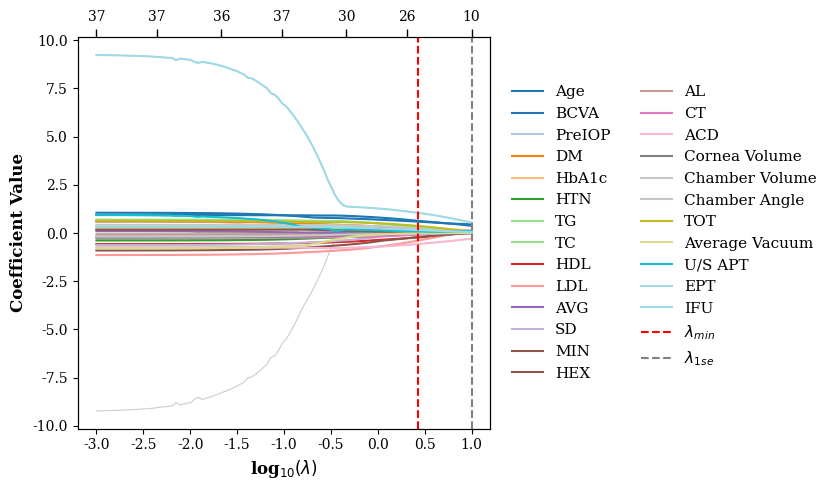

In [14]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
from matplotlib.font_manager import FontProperties
import matplotlib.cm as cm
from sklearn.linear_model import LogisticRegression

# --- 1. 从 results_df 中获取 λ_min 和 λ_1se ---
best_idx_min = results_df['Mean_Deviance'].idxmin()
lambda_min = results_df.loc[best_idx_min, 'lambda']

mean_dev = results_df['Mean_Deviance'].values
std_dev = results_df['Dev_Std'].values
best_mean_dev = mean_dev[best_idx_min]
best_std_dev = std_dev[best_idx_min]
threshold = best_mean_dev + best_std_dev
candidates = np.where(mean_dev <= threshold)[0]
_1se_idx = candidates[-1]
lambda_1se = results_df.loc[_1se_idx, 'lambda']

# --- 计算所有λ对应的特征数量 ---
Cs = 1 / results_df['lambda'].values 
full_data_n_features = []
for C_val in Cs:
    model = LogisticRegression(penalty='l1', solver='liblinear',
                               C=C_val, random_state=42, max_iter=1000)
    model.fit(X_train_scaled, y_train)
    full_data_n_features.append(np.count_nonzero(model.coef_))

# --- 定义统一的log_lambda数组 ---
log_lambda = np.log10(results_df['lambda'].values)

# --- 2. 开始绘图 ---
fig, ax = plt.subplots(figsize=(10, 5), dpi=100)

# --- 3. 绘制系数路径 ---
# 获取在 λ_min 处被选中的特征
C_min = results_df.loc[best_idx_min, 'C']
model_min = LogisticRegression(penalty='l1', solver='liblinear', C=C_min, random_state=42, max_iter=1000)
model_min.fit(X_train_scaled, y_train)
selected_features_mask = model_min.coef_[0] != 0
selected_feature_names = X_train_scaled.columns[selected_features_mask]

# 绘制所有特征的路径，但使用低透明度
for col in coef_df.columns:
    ax.plot(coef_df.index, coef_df[col], color='gray', linewidth=0.8, alpha=0.4)

# 高亮显示被选中特征的路径（λ_min 选中的特征）
num_selected = len(selected_feature_names)
if num_selected > 0:
    cmap = cm.get_cmap('tab20', num_selected)
    colors = [cmap(i) for i in range(num_selected)]

    for i, col in enumerate(selected_feature_names):
        ax.plot(coef_df.index, coef_df[col], label=col, color=colors[i], linewidth=1.5)

# --- 4. 添加关键竖线和零线 ---
# 使用统一的log_lambda数组来定位竖线，确保与刻度对齐
ax.axvline(log_lambda[best_idx_min], linestyle='--', color='red', linewidth=1.5, label=r'$\lambda_{min}$')
ax.axvline(log_lambda[_1se_idx], linestyle='--', color='grey', linewidth=1.5, label=r'$\lambda_{1se}$')
# ax.axhline(0, color='black', linestyle='--', linewidth=1.5)

# --- 5. 设置底部轴的标签和格式 ---
ax.set_xlabel(r'log$_{10}(\lambda)$', fontsize=12, weight='bold')
ax.set_ylabel('Coefficient Value', fontsize=12, weight='bold')
ax.tick_params(labelsize=10)
ax.grid(False)

# --- 创建顶部轴并设置稀疏刻度 ---
ax2 = ax.twiny()
ax2.set_xlim(ax.get_xlim())

# --- 使用 np.linspace 选取稀疏的刻度位置 ---
# 从所有log_lambda中均匀选取7个位置
idx_ticks = np.linspace(0, len(log_lambda) - 1, 7, dtype=int)
ax2.set_xticks(log_lambda[idx_ticks])

# 为选定的稀疏刻度位置设置标签
n_features_for_plot = np.array(full_data_n_features)
ax2.set_xticklabels(n_features_for_plot[idx_ticks], fontsize=10)

# 设置顶部轴的刻度样式为黑色
ax2.tick_params(axis='x', labelsize=10, labelcolor='black', length=6, width=1)

# --- 6. 设置图例 ---
# 获取主轴的handles和labels
handles, labels = ax.get_legend_handles_labels()

# 将λ的图例放到最后
order = [i for i in range(num_selected)] + [num_selected, num_selected + 1]

ax.legend([handles[idx] for idx in order], [labels[idx] for idx in order],
          loc='center left', bbox_to_anchor=(1.02, 0.5),
          ncol=2,
          fontsize=11, frameon=False)

# --- 7. 保存和显示 ---
# 调整 tight_layout 的 rect 参数，为右侧图例留出空间
plt.tight_layout(rect=[0, 0, 0.85, 1]) 
plt.savefig("lasso_coefficient_path.pdf", format='pdf', dpi=300, bbox_inches='tight')
plt.show()

# Boruta特征筛选

**方法论：Boruta 是什么？**

要理解代码，首先要理解 Boruta。

传统方法的问题：很多特征重要性方法（比如随机森林自带的 feature_importances_）给出的排名是相对的。你可能会知道特征A比特征B重要，但你不知道特征A本身是否“足够重要”到应该被保留。

Boruta 的解决方案：Boruta 是一个非常巧妙和严格的“全相关”特征选择方法。它的工作原理如下：

创建“影子特征” (Shadow Features)：对于你数据中的每一个真实特征，Boruta 都会通过打乱该特征的值来创建一个新的、假的特征。这个“影子特征”和原始特征有完全相同的分布，但与目标变量 y 毫无关系。

合并与训练：将这些影子特征和你的真实特征合并在一起，然后用一个随机森林模型进行训练。

比较重要性：训练结束后，比较每一个真实特征的重要性得分与所有影子特征中最高的重要性得分。

迭代决策：

如果一个真实特征的重要性显著高于最好的影子特征，它就被标记为 “确认” (Confirmed)。

如果一个真实特征的重要性显著低于最好的影子特征，它就被标记为 “拒绝” (Rejected)。

如果介于两者之间，它就被标记为 “暂定” (Tentative)，并进入下一轮迭代。

这个过程会持续多次迭代，直到所有特征都被最终确认或拒绝。

结论：Boruta 的好处是它提供了一个统计上严格的检验，而不是一个简单的排名。它告诉你一个特征是否比随机噪声（影子特征）更有用。

## 定义随机森林模型

In [15]:
from sklearn.ensemble import RandomForestClassifier
from boruta import BorutaPy

print("-------------- 原始训练集异常值 -------------------")
print(X_train.isnull().sum().sort_values(ascending=False).head(2))
print("-------------- 原始测试集异常值 -------------------")
print(X_test.isnull().sum().sort_values(ascending=False).head(2))

# 中位数填补
X_train['LT'].fillna(X_train['LT'].median(), inplace=True)
# 测试集里也可能出现 NaN，同样处理
X_test['LT'].fillna(X_train['LT'].median(), inplace=True)
print("-------------- 填补后训练集异常值 -------------------")
print(X_train.isnull().sum().sort_values(ascending=False).head(2))


# 初始化随机森林模型
rf = RandomForestClassifier(n_jobs=-1, class_weight='balanced', max_depth=5)

# 初始化Boruta特征选择器
boruta_selector = BorutaPy(
    rf,                            # 使用随机森林作为基础分类器
    n_estimators='auto',           # 树的数量设置为'auto'，Boruta会自动确定
    verbose=2,                     # 显示详细日志信息
    random_state=42                # 随机数种子
)

# 对训练数据进行特征选择
boruta_selector.fit(X_train.values, y_train.values)

# 检查选中的特征
selected_features = X_train.columns[boruta_selector.support_].to_list()
print("Selected Features: ", selected_features)

# 打印被剔除的特征
rejected_features = X_train.columns[~boruta_selector.support_].to_list()
print("Rejected Features: ", rejected_features)

# 打印有待定性的特征
tentative_features = X_train.columns[boruta_selector.support_weak_].to_list()
print("Tentative Features: ", tentative_features)


-------------- 原始训练集异常值 -------------------
LT     1
Age    0
dtype: int64
-------------- 原始测试集异常值 -------------------
Age    0
MIN    0
dtype: int64
-------------- 填补后训练集异常值 -------------------
Age    0
MIN    0
dtype: int64
Iteration: 	1 / 100
Confirmed: 	0
Tentative: 	37
Rejected: 	0
Iteration: 	2 / 100
Confirmed: 	0
Tentative: 	37
Rejected: 	0
Iteration: 	3 / 100
Confirmed: 	0
Tentative: 	37
Rejected: 	0
Iteration: 	4 / 100
Confirmed: 	0
Tentative: 	37
Rejected: 	0
Iteration: 	5 / 100
Confirmed: 	0
Tentative: 	37
Rejected: 	0
Iteration: 	6 / 100
Confirmed: 	0
Tentative: 	37
Rejected: 	0
Iteration: 	7 / 100
Confirmed: 	0
Tentative: 	37
Rejected: 	0
Iteration: 	8 / 100
Confirmed: 	12
Tentative: 	1
Rejected: 	24
Iteration: 	9 / 100
Confirmed: 	12
Tentative: 	1
Rejected: 	24
Iteration: 	10 / 100
Confirmed: 	12
Tentative: 	1
Rejected: 	24
Iteration: 	11 / 100
Confirmed: 	12
Tentative: 	1
Rejected: 	24
Iteration: 	12 / 100
Confirmed: 	12
Tentative: 	1
Rejected: 	24
Iteration: 	13 / 100
C

其实从特征筛选层面前面的代码就已经完成了特征筛选的过程，但是为了保证特征筛选的稳定性进行多次Boruta模拟运行并记录每次运行结果并可视化。

## 获取特征排名

In [16]:
# 获取特征排名
feature_ranks = boruta_selector.ranking_
# 将特征名称和排名结合成一个DataFrame
feature_importance_df = pd.DataFrame({
    'Feature': X_train.columns,
    'Rank': feature_ranks
})
feature_importance_df.head(100)

,Feature,Rank
0,Age,1
1,Sex,24
2,PVA,1
3,BCVA,1
4,PreIOP,18
5,HOS,26
6,DM,23
7,HbA1c,22
8,HTN,25
9,TG,12


通过 Rank 列，可以清晰地看出哪些特征被 Boruta 算法选中（Rank = 1），哪些特征未被选中（Rank > 1）。

## 多次计算统计排名

In [17]:
# 初始化随机森林模型
rf = RandomForestClassifier(n_jobs=-1, class_weight='balanced', max_depth=5)

# 初始化存储特征排名的 DataFrame
ranking_df = pd.DataFrame(index=range(1, 31), columns=X_train.columns)

# 运行 Boruta 30 次
for i in range(30):
    print(f"Iteration {i+1}")  # Boruta 通过 “打乱原始特征值” 生成 “阴影特征”（用于判断原始特征是否比随机噪声更重要），random_state 固定打乱的顺序；
    
    # 初始化Boruta特征选择器
    boruta_selector = BorutaPy(rf, n_estimators='auto', verbose=2, random_state=i, max_iter=50)
    
    # 对训练数据进行特征选择
    boruta_selector.fit(X_train.values, y_train.values)
    
    # 获取特征排名
    feature_ranks = boruta_selector.ranking_
    
    # 将特征排名保存到 DataFrame 中
    ranking_df.loc[i+1] = feature_ranks
    

Iteration 1
Iteration: 	1 / 50
Confirmed: 	0
Tentative: 	37
Rejected: 	0
Iteration: 	2 / 50
Confirmed: 	0
Tentative: 	37
Rejected: 	0
Iteration: 	3 / 50
Confirmed: 	0
Tentative: 	37
Rejected: 	0
Iteration: 	4 / 50
Confirmed: 	0
Tentative: 	37
Rejected: 	0
Iteration: 	5 / 50
Confirmed: 	0
Tentative: 	37
Rejected: 	0
Iteration: 	6 / 50
Confirmed: 	0
Tentative: 	37
Rejected: 	0
Iteration: 	7 / 50
Confirmed: 	0
Tentative: 	37
Rejected: 	0
Iteration: 	8 / 50
Confirmed: 	13
Tentative: 	5
Rejected: 	19
Iteration: 	9 / 50
Confirmed: 	13
Tentative: 	5
Rejected: 	19
Iteration: 	10 / 50
Confirmed: 	13
Tentative: 	5
Rejected: 	19
Iteration: 	11 / 50
Confirmed: 	13
Tentative: 	5
Rejected: 	19
Iteration: 	12 / 50
Confirmed: 	13
Tentative: 	3
Rejected: 	21
Iteration: 	13 / 50
Confirmed: 	13
Tentative: 	3
Rejected: 	21
Iteration: 	14 / 50
Confirmed: 	13
Tentative: 	3
Rejected: 	21
Iteration: 	15 / 50
Confirmed: 	13
Tentative: 	3
Rejected: 	21
Iteration: 	16 / 50
Confirmed: 	13
Tentative: 	3
Rejected: 

## 展示特征筛选结果

In [18]:
ranking_df

,Age,Sex,PVA,BCVA,PreIOP,HOS,DM,HbA1c,HTN,TG,...,Chamber Angle,TOT,Average Vacuum,Vacuum Time,US AVE,U/S APT,CDE2,CDE,EPT,IFU
1,1,22,1,1,12,24,21,20,23,10,...,8,1,8,1,1,1,1,1,1,5
2,1,24,1,1,12,26,23,22,25,13,...,10,1,6,1,3,1,1,1,1,7
3,1,23,1,1,15,25,22,21,25,15,...,11,1,6,1,2,1,1,1,1,5
4,1,23,1,1,13,26,23,22,25,10,...,13,1,7,1,3,1,1,1,1,5
5,1,25,1,1,12,27,24,23,25,16,...,12,1,5,1,4,1,1,1,1,7
6,1,23,1,1,13,24,22,20,24,14,...,8,1,4,1,2,1,1,1,1,4
7,1,24,1,1,17,25,23,22,26,10,...,10,1,8,1,2,1,1,1,1,5
8,1,24,1,1,11,26,23,22,24,12,...,15,1,5,1,2,1,1,1,1,5
9,1,23,1,1,13,25,22,21,24,11,...,10,1,6,1,2,1,1,1,1,5
10,1,24,1,1,13,26,23,22,25,12,...,11,1,4,1,3,1,1,1,1,7


表格记录了 30次独立的 Boruta 运行中，每一个特征在每一次运行里得到的排名。

每一行：代表 Boruta 的一次运行（从第1次到第30次）
。
每一列：代表你的数据集中的一个特征（如 PVA, BCVA, PreIOP 等）。

单元格中的数字：代表该特征在这一次运行中得到的排名。

**注意: Boruta 的目标不是给特征做一个“第一名、第二名、第三名”的排名，而是对每一个特征进行独立的“是否重要”的二元分类检验。**

你可以把 Boruta 的过程想象成一场考试，及格线是60分：

排名 = 1：代表这个特征“及格了”，被确认是重要特征。

排名 > 1：代表这个特征“没及格”，是不重要或待定的特征。

所以，当多个特征都获得排名 1 时，并不意味着它们“并列第一”，而是意味着它们都通过了 Boruta 的严格检验，都被确认为重要特征。它们就像一群考试都考了85分以上的学生，都达到了“优秀”的标准，但我们不能仅凭分数就说谁比谁更优秀。

## 特征筛选可视化

In [19]:
# import matplotlib.pyplot as plt
# import numpy as np
# import pandas as pd

# # 为排名数据添加微小抖动，避免箱线图重叠
# def add_jitter_to_rankings(df, jitter_scale=0.1):
#     """为DataFrame添加微小的随机抖动，以展开箱线图"""
#     jittered_df = df.copy()
#     noise = np.random.uniform(-jitter_scale, jitter_scale, size=df.shape)
#     jittered_df += noise
#     return jittered_df

# # 确保数据是数值型
# numeric_ranking_df = ranking_df.apply(pd.to_numeric, errors='coerce')

# # 应用抖动
# jittered_ranking_df = add_jitter_to_rankings(numeric_ranking_df, jitter_scale=0.15)

# # 计算每个特征的中位数
# median_values = numeric_ranking_df.median()

# # 根据中位数对列进行排序
# sorted_columns = median_values.sort_values().index

# # 获取Boruta分类结果（选中/拒绝/待定）
# selected_features = X_train.columns[boruta_selector.support_].to_list()
# rejected_features = X_train.columns[~boruta_selector.support_].to_list()
# tentative_features = X_train.columns[boruta_selector.support_weak_].to_list()

# # 颜色映射（选中=深绿，拒绝=深红，待定=金黄）
# color_map = {feature: "#2E8B57" for feature in selected_features}  # SeaGreen
# color_map.update({feature: "#DC143C" for feature in rejected_features})  # Crimson
# color_map.update({feature: "#FFB90F" for feature in tentative_features})  # DarkGoldenrod

# # ========== 画布尺寸 ==========
# plt.figure(figsize=(14, 6))  
# ax = plt.gca()

# # 准备数据：按排序后的列顺序提取抖动数据
# data_to_plot = [jittered_ranking_df[col] for col in sorted_columns]

# # 准备每个箱体对应的颜色
# colors_for_plot = [color_map.get(col, 'grey') for col in sorted_columns]

# # 绘制箱线图（显式指定positions，解决刻度错位）
# bp = ax.boxplot(data_to_plot, patch_artist=True, widths=0.6, vert=True,
#                 positions=np.arange(len(sorted_columns)))

# # 手动设置每个箱体的颜色和样式
# for patch, color in zip(bp['boxes'], colors_for_plot):
#     patch.set_facecolor(color)
#     patch.set_edgecolor('black')
#     patch.set_linewidth(1.2)

# # 自定义其他元素（中位数线、须线等）的颜色和样式
# for median in bp['medians']:
#     median.set(color='black', linewidth=2)
# for whisker in bp['whiskers']:
#     whisker.set(color='black', linewidth=1.2, linestyle='-')
# for cap in bp['caps']:
#     cap.set(color='black', linewidth=1.2)
# for flier in bp['fliers']:
#     flier.set(marker='o', markerfacecolor='grey', markersize=4, markeredgecolor='none', alpha=0.5)

# # ========== 调整标签样式，减少重叠 ==========
# ax.set_xticks(np.arange(len(sorted_columns)))
# # 1. 增大旋转角度（45→60°），减少横向占用；2. 缩小字体（12→10号）；3. 右对齐（ha='right'）避免尾部重叠
# ax.set_xticklabels(sorted_columns, rotation=60, ha='right', fontsize=10)
# # 设置X轴标签颜色与对应特征一致
# for tick, label_name in zip(ax.get_xticklabels(), sorted_columns):
#     tick.set_color(color_map.get(label_name, "black"))

# # ========== 增加X轴刻度间距（特征极多时用） ==========
# # 如果特征数>20，可通过调整positions扩大间距（代价是箱体变稀疏）
# # bp = ax.boxplot(data_to_plot, patch_artist=True, widths=0.6, vert=True,
# #                 positions=np.linspace(0, len(sorted_columns)*1.2, len(sorted_columns)))  # 间距扩大20%
# # ax.set_xticks(np.linspace(0, len(sorted_columns)*1.2, len(sorted_columns)))

# # 设置Y轴刻度样式
# ax.tick_params(axis='y', which='major', length=6, width=1.5, color='black', labelsize=14)

# # 其他样式设置
# ax.set_ylabel("Boruta Importance Ranking", fontsize=14, fontweight='bold')
# ax.set_facecolor('white')
# ax.grid(False)
# for spine in ax.spines.values():
#     spine.set_linewidth(1.2)
#     spine.set_color('#333333')

# # 添加图例
# handles = [
#     plt.Line2D([0], [0], marker='s', color='w', markerfacecolor="#2E8B57", markersize=12, label='Selected'),
#     plt.Line2D([0], [0], marker='s', color='w', markerfacecolor="#DC143C", markersize=12, label='Rejected'),
#     plt.Line2D([0], [0], marker='s', color='w', markerfacecolor="#FFB90F", markersize=12, label='Tentative')
# ]
# ax.legend(handles=handles, loc='upper center', bbox_to_anchor=(0.25, 0.95), frameon=False, fontsize=12, ncol=3)

# # ========== 调整布局，给X轴标签预留更多底部空间 ==========
# plt.tight_layout(rect=[0, 0.1, 1, 0.95])  # rect=[左, 下, 右, 上]，下边界从0→0.1，增加标签空间

# # 保存和显示（bbox_inches='tight'自动裁剪多余空白，避免标签被截断）
# plt.savefig("boruta_feature_ranking.pdf", format='pdf', bbox_inches='tight', dpi=300)
# plt.show()

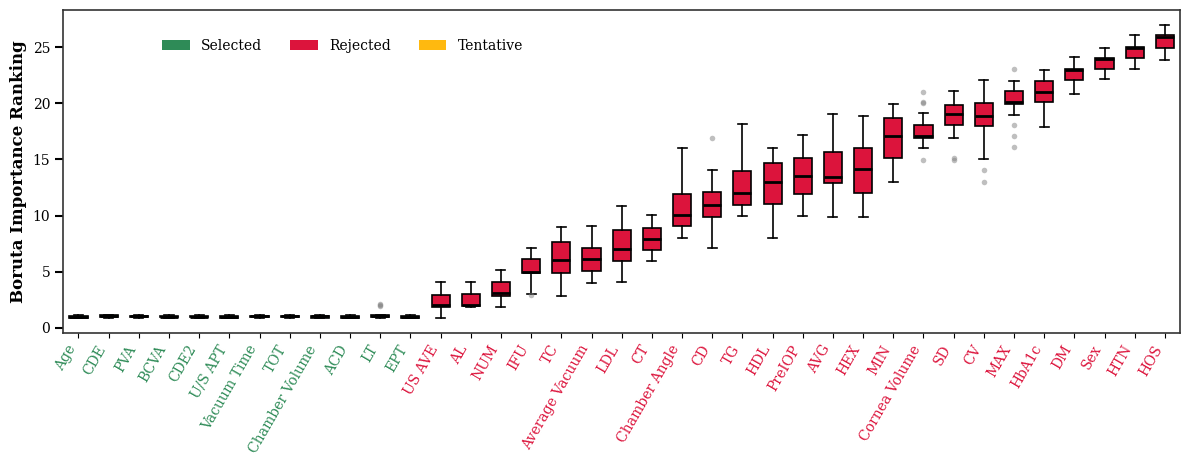

In [20]:
import matplotlib.pyplot as plt
import numpy as np
import pandas as pd

# 为排名数据添加微小抖动，避免箱线图重叠
def add_jitter_to_rankings(df, jitter_scale=0.1):
    jittered_df = df.copy()
    noise = np.random.uniform(-jitter_scale, jitter_scale, size=df.shape)
    jittered_df += noise
    return jittered_df

# 数据预处理：转为数值型+添加抖动
numeric_ranking_df = ranking_df.apply(pd.to_numeric, errors='coerce')
jittered_ranking_df = add_jitter_to_rankings(numeric_ranking_df, jitter_scale=0.15)

# 按特征中位数排序（保证箱线图顺序合理）
median_values = numeric_ranking_df.median()
sorted_columns = median_values.sort_values().index  # 排序后的特征名

# 提取Boruta分类结果（选中/拒绝/待定）
selected_features = X_train.columns[boruta_selector.support_].to_list()
rejected_features = X_train.columns[~boruta_selector.support_].to_list()
tentative_features = X_train.columns[boruta_selector.support_weak_].to_list()

# 特征颜色映射（选中=深绿，拒绝=深红，待定=金黄）
color_map = {feature: "#2E8B57" for feature in selected_features}
color_map.update({feature: "#DC143C" for feature in rejected_features})
color_map.update({feature: "#FFB90F" for feature in tentative_features})

# 创建画布与坐标轴
plt.figure(figsize=(12, 5))
ax = plt.gca()

# 准备绘图数据（按排序后的特征提取抖动数据）
data_to_plot = [jittered_ranking_df[col] for col in sorted_columns]
# 准备对应特征的颜色
colors_for_plot = [color_map.get(col, 'grey') for col in sorted_columns]

# 绘制箱线图（patch_artist=True允许自定义箱体颜色）
# 关键：设置positions参数，确保刻度与箱体位置完全对齐
bp = ax.boxplot(data_to_plot, patch_artist=True, widths=0.6, vert=True,
                positions=np.arange(len(sorted_columns)))  # 显式指定箱体位置为0,1,2...

# 自定义箱体样式（颜色+边框）
for patch, color in zip(bp['boxes'], colors_for_plot):
    patch.set_facecolor(color)
    patch.set_edgecolor('black')
    patch.set_linewidth(1.2)

# 自定义箱线图其他元素样式（中位数线/须/帽/异常值）
for median in bp['medians']:
    median.set(color='black', linewidth=2)
for whisker in bp['whiskers']:
    whisker.set(color='black', linewidth=1.2, linestyle='-')
for cap in bp['caps']:
    cap.set(color='black', linewidth=1.2)
for flier in bp['fliers']:
    flier.set(marker='o', markerfacecolor='grey', markersize=4, markeredgecolor='none', alpha=0.5)

# X轴刻度设置（解决错位+中心对齐）
ax.set_xticks(np.arange(len(sorted_columns)))  # 刻度位置与箱体位置一致（0,1,2...）
ax.set_xticklabels(sorted_columns, rotation=60, ha='right', fontsize=10)  # ha='center'中心对齐

# X轴刻度标签颜色与对应特征一致
for tick, label_name in zip(ax.get_xticklabels(), sorted_columns):
    tick.set_color(color_map.get(label_name, "black"))

# Y轴样式设置
ax.tick_params(axis='y', which='major', length=6, width=1.5, color='black', labelsize=10)
ax.set_ylabel("Boruta Importance Ranking", fontsize=12, fontweight='bold')

# 画布样式优化（背景色+边框）
ax.set_facecolor('white')
ax.grid(False)
for spine in ax.spines.values():
    spine.set_linewidth(1.2)
    spine.set_color('#333333')

# 图例（纯色块样式，与箱体颜色匹配）
from matplotlib.patches import Patch
handles = [
    Patch(facecolor="#2E8B57", label='Selected'),
    Patch(facecolor="#DC143C", label='Rejected'),
    Patch(facecolor="#FFB90F", label='Tentative')
]
ax.legend(handles=handles, loc='upper center', bbox_to_anchor=(0.25, 0.95), frameon=False, fontsize=10, ncol=3)

# 调整布局（预留图例空间）
plt.tight_layout(rect=[0, 0, 1, 0.95])
plt.savefig("boruta_feature_ranking.pdf", format='pdf', bbox_inches='tight', dpi=300)
plt.show()

# Boruta特征筛选结果

In [21]:
# --- 将最终筛选的特征打印并转成DataFrame ---

# 1. 整合最终筛选的特征
# 通常 Selected 和 Tentative 特征都被认为是重要的
final_selected_features = selected_features + tentative_features

# 2. 打印特征列表
print("--- 最终筛选的特征列表 ---")
print(f"确认选择的特征: {selected_features}")
print(f"待定特征: {tentative_features}")
print(f"\n所有最终筛选的特征 (共 {len(final_selected_features)} 个):")
print(final_selected_features)

# 3. 转换为 DataFrame
# 创建一个DataFrame来展示这些特征及其状态
final_features_df = pd.DataFrame({
    'Feature': final_selected_features,
    'Status': ['Selected'] * len(selected_features) + ['Tentative'] * len(tentative_features)
})

# 打印DataFrame
print("\n--- 最终筛选的特征 DataFrame ---")
final_features_df

# 将这个DataFrame保存到CSV文件
# final_features_df.to_csv('final_selected_features.csv', index=False)
# print("\n特征已保存到 'final_selected_features.csv' 文件。")


--- 最终筛选的特征列表 ---
确认选择的特征: ['Age', 'PVA', 'BCVA', 'LT', 'ACD', 'Chamber Volume', 'TOT', 'Vacuum Time', 'U/S APT', 'CDE2', 'CDE', 'EPT']
待定特征: []

所有最终筛选的特征 (共 12 个):
['Age', 'PVA', 'BCVA', 'LT', 'ACD', 'Chamber Volume', 'TOT', 'Vacuum Time', 'U/S APT', 'CDE2', 'CDE', 'EPT']

--- 最终筛选的特征 DataFrame ---


,Feature,Status
0,Age,Selected
1,PVA,Selected
2,BCVA,Selected
3,LT,Selected
4,ACD,Selected
5,Chamber Volume,Selected
6,TOT,Selected
7,Vacuum Time,Selected
8,U/S APT,Selected
9,CDE2,Selected


# Lasso特征筛选结果

In [22]:
#  打印两个准则处的「特征数 + 特征名」 并将λ_min对应的特征转为DataFrame
lambda_min_features_df = None  # 初始化存储λ_min特征的DataFrame

for name, idx in [('λ_min', best_idx), ('λ_1se', _1se_idx)]:
    C_val = results_df.iloc[idx]['C']
    model = LogisticRegression(penalty='l1', solver='liblinear',
                               C=C_val, random_state=42, max_iter=1000)
    model.fit(X_train_scaled, y_train)          # 用全数据重训一次
    coef = model.coef_[0]
    nz_mask = coef != 0
    nz_names = X_train_scaled.columns[nz_mask].tolist()
    nz_coefs = coef[nz_mask].tolist()  # 提取非零特征对应的系数
    
    # 打印信息（保持原有逻辑）
    print(f"{name}: n_features = {len(nz_names)}")
    print("  non-zero vars:", nz_names, "\n")
    
    # 针对λ_min，创建特征名+系数的DataFrame
    if name == 'λ_min':
        lambda_min_features_df = pd.DataFrame({
            '特征名': nz_names,
            '系数值': nz_coefs
        }).sort_values(by='系数值', ascending=False)  # 按系数值降序排序

# 查看λ_min对应的特征DataFrame
print("λ_min对应的特征及系数DataFrame：")
lambda_min_features_df

λ_min: n_features = 25
  non-zero vars: ['Age', 'BCVA', 'PreIOP', 'DM', 'HbA1c', 'HTN', 'TG', 'TC', 'HDL', 'LDL', 'AVG', 'SD', 'MIN', 'HEX', 'AL', 'CT', 'ACD', 'Cornea Volume', 'Chamber Volume', 'Chamber Angle', 'TOT', 'Average Vacuum', 'U/S APT', 'EPT', 'IFU'] 

λ_1se: n_features = 10
  non-zero vars: ['Age', 'BCVA', 'PreIOP', 'HbA1c', 'HEX', 'ACD', 'TOT', 'U/S APT', 'EPT', 'IFU'] 

λ_min对应的特征及系数DataFrame：


,特征名,系数值
23,EPT,1.040928
0,Age,0.632164
1,BCVA,0.590408
20,TOT,0.365621
7,TC,0.278047
19,Chamber Angle,0.221335
2,PreIOP,0.202419
4,HbA1c,0.183981
3,DM,0.159717
24,IFU,0.157068


# 两种方法共同筛选得特征

In [23]:
# --- 取 lambda_min_features_df 和 final_features_df 的交集 ---

# 1. 提取两个DataFrame中的特征集合
# 使用正确的列名 '特征名' 来访问Lasso特征
lambda_features_set = set(lambda_min_features_df['特征名']) 
boruta_features_set = set(final_features_df['Feature'])

# 2. 计算交集
common_features = lambda_features_set.intersection(boruta_features_set)

# 3. 打印交集信息
print("\n--- Lasso与Boruta筛选结果的特征交集 ---")
print(f"Lasso筛选出的特征数: {len(lambda_features_set)}")
print(f"Boruta筛选出的特征数: {len(boruta_features_set)}")
print(f"两者共有的特征数: {len(common_features)}")
print(f"共有的特征列表: {list(common_features)}")

# 4. 将交集转换为新的DataFrame
# 为了创建一个信息丰富的DataFrame，我们不仅保留特征名，还保留它们在原始筛选中的状态
common_features_list = list(common_features)

# 从原始DataFrame中筛选出交集部分的数据
# 使用正确的列名 '特征名' 来筛选Lasso特征
lambda_common_df = lambda_min_features_df[lambda_min_features_df['特征名'].isin(common_features)].reset_index(drop=True)
# 为了统一列名，方便后续合并，我们将 '特征名' 列重命名为 'Feature'
lambda_common_df.rename(columns={'特征名': 'Feature'}, inplace=True)

boruta_common_df = final_features_df[final_features_df['Feature'].isin(common_features)].reset_index(drop=True)

# 合并这两个DataFrame，以特征名为键
intersection_df = pd.merge(lambda_common_df, boruta_common_df, on='Feature', how='inner', suffixes=('_Lasso', '_Boruta'))

# 打印最终的交集DataFrame
print("\n--- 交集特征详情DataFrame ---")
intersection_df

# 将这个交集DataFrame保存到CSV文件
# intersection_df.to_csv('common_features_lasso_boruta.csv', index=False)
# print("\n交集特征已保存到 'common_features_lasso_boruta.csv' 文件。")


--- Lasso与Boruta筛选结果的特征交集 ---
Lasso筛选出的特征数: 25
Boruta筛选出的特征数: 12
两者共有的特征数: 7
共有的特征列表: ['BCVA', 'Age', 'EPT', 'TOT', 'Chamber Volume', 'ACD', 'U/S APT']

--- 交集特征详情DataFrame ---


,Feature,系数值,Status
0,EPT,1.040928,Selected
1,Age,0.632164,Selected
2,BCVA,0.590408,Selected
3,TOT,0.365621,Selected
4,U/S APT,0.082562,Selected
5,Chamber Volume,-0.037075,Selected
6,ACD,-0.568723,Selected
